In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
sns.set(style="whitegrid")
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

##  Ornstein–Uhlenbeck Process (Statistical Physics)

The equation for a Brownian particle in a fluid with friction was originally introduce by Langevin (1908).  Ornstein and Uhlenbeck (1930) solved this equation explicitly and analyzed its properties.

$$\frac{d v(t)}{dt} = -\gamma v(t) + \eta(t)$$

or in differential form:

$$d v = -\gamma v \, dt + \sigma \, dW_t$$

where:
- $v(t)$ is the velocity of a Brownian particle.
- $\gamma > 0$ is the friction coefficient (also called the damping rate or drag coefficient).
- $\eta(t)$ is a random force (often modeled as Gaussian white noise).
- $\sigma$ is the noise amplitude, controlling the strength of stochastic fluctuations.
- $W_t$ is a Wiener process (Brownian motion), meaning \eta(t) is usually taken as Gaussian white noise with properties:
  
  $$\langle \eta(t) \rangle = 0, \quad \langle \eta(t) \eta(t{\prime}) \rangle = 2D \delta(t - t{\prime})$$
  
where D is the diffusion coefficient and $\delta(t - t{\prime})$ is the Dirac delta function.

Solving for v(t):

$$ v(t) = v_0 e^{-\gamma t} + \int_0^t e^{-\gamma (t - s)} \eta(s) ds$$


### Example

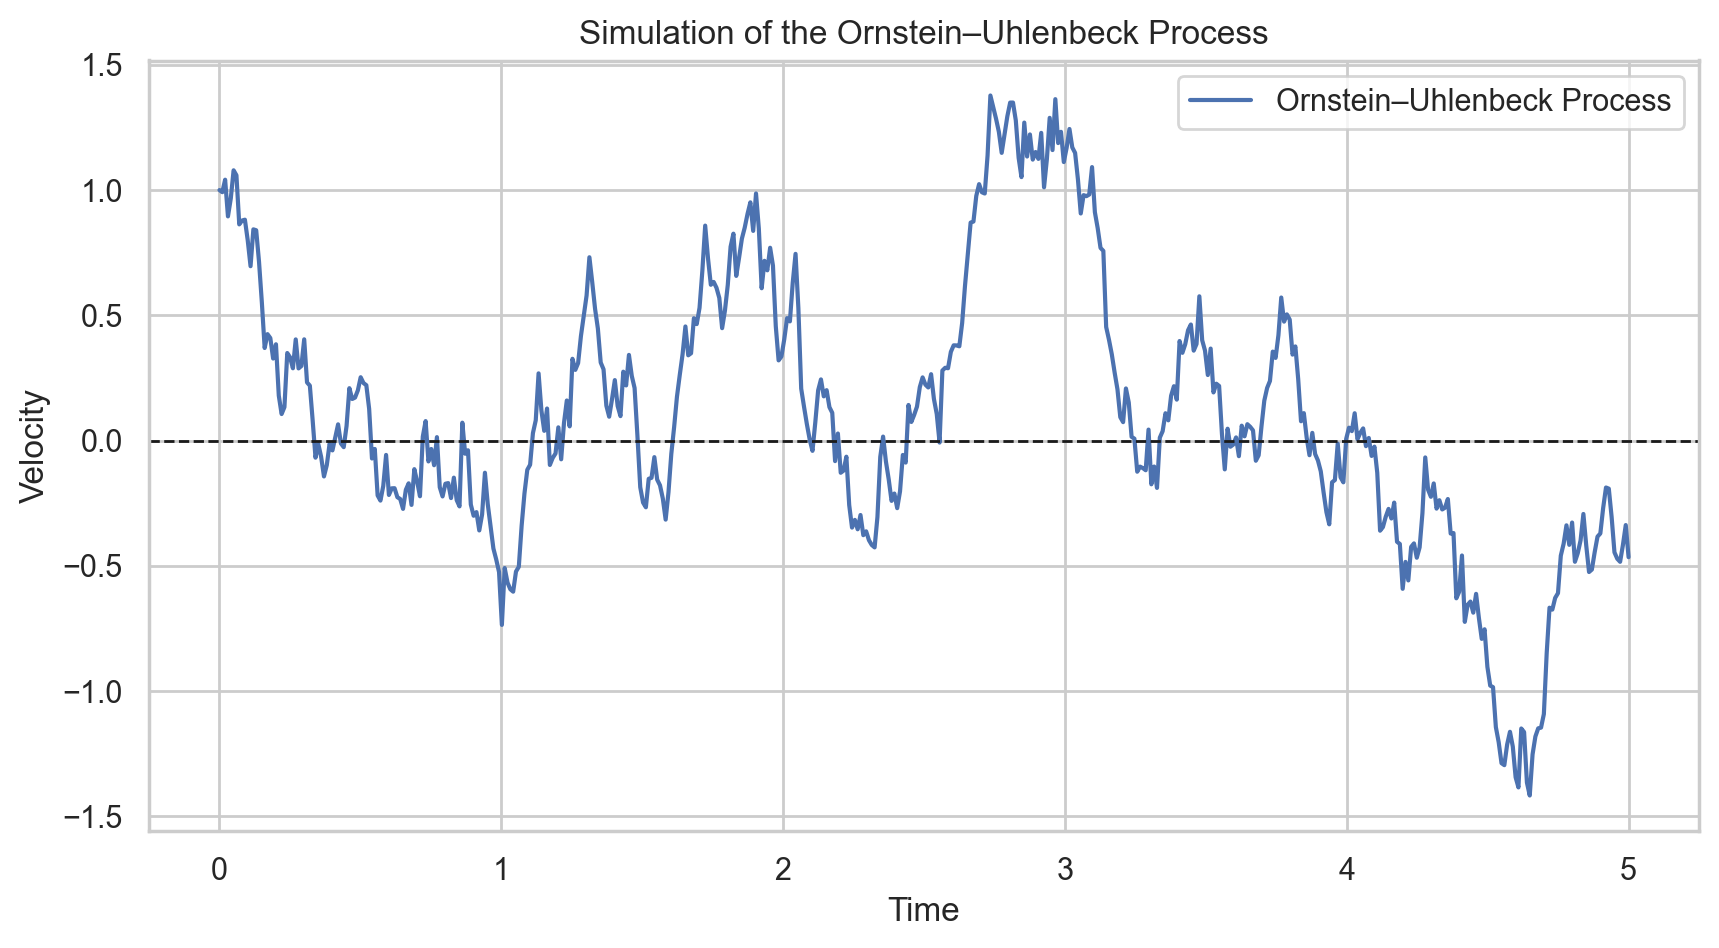

In [3]:
# Parameters
gamma = 1.0   # Mean-reversion speed
sigma = 1.0   # Noise intensity
v0 = 1.0      # Initial velocity
dt = 0.01     # Time step
T = 5.0       # Total time
N = int(T / dt)  # Number of time steps

# Time array
t = np.linspace(0, T, N)

# Initialize velocity array
v = np.zeros(N)
v[0] = v0

# Generate random noise (Brownian motion increments)
dW = np.sqrt(dt) * np.random.randn(N)

# Euler-Maruyama method for solving the SDE
for i in range(1, N):
    v[i] = v[i-1] - gamma * v[i-1] * dt + sigma * dW[i]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, v, label="Ornstein–Uhlenbeck Process")
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Simulation of the Ornstein–Uhlenbeck Process")
plt.legend()
plt.show()


## Vasicek Interest Rate Model (Direct Application of OU Process)

The Vasicek model for the instataneous interest rate is definited by the following stochastic equation:

\begin{equation}
dr_t = \theta (\mu - r_t) dt + \sigma dW_t
\end{equation}

where:
- $r_t$ is the interest rate (analogous to velocity v).
- $\theta$ controls how quickly rates revert to the long term $\mu$ (similar to $\gamma$ in physics).
- $\sigma$ represents rate volatility

### Solving SDE the equation Using the Integrating Factor Method

To solve the Vasicek equation, let’s use an integrating factor.

Step 1: Rewrite the Equation in a Standard Form

$$d r_t + \theta r_t dt = \theta \mu dt + \sigma dW_t.$$

Multiply both sides by $e^{\theta t}$, an integrating factor:
$$e^{\theta t} d r_t + \theta e^{\theta t} r_t dt = \theta \mu e^{\theta t} dt + \sigma e^{\theta t} dW_t.$$


Step 2: Recognizing a Total Derivative

$$d (r_t e^{\theta t}) = \theta \mu e^{\theta t} dt + \sigma e^{\theta t} dW_t.$$

Integrating both sides from 0 to t:

$$r_t e^{\theta t} - r_0 = \theta \mu \int_0^t e^{\theta s} ds + \sigma \int_0^t e^{\theta s} dW_s.$$

### Evaluating the Integrals

First Integral: Deterministic Part

$$\int_0^t e^{\theta s} ds = \frac{e^{\theta t} - 1}{\theta}.$$

Multiplying by $\theta \mu$:
$$\theta \mu \int_0^t e^{\theta s} ds = \mu (e^{\theta t} - 1).$$

Second Integral: Stochastic Part (Ito Integral)

$$\int_0^t e^{\theta s} dW_s$$

is a stochastic integral. The result follows from standard methods in stochastic calculus:

$$\int_0^t e^{\theta s} dW_s \sim \mathcal{N} \left(0, \frac{e^{2\theta t} - 1}{2\theta} \right).$$

### Final Solution

Solving for $r_t$:

$$r_t = r_0 e^{-\theta t} + \mu (1 - e^{-\theta t}) + \sigma \int_0^t e^{-\theta (t-s)} dW_s.$$

The stochastic integral is normally distributed:

$$\int_0^t e^{-\theta (t-s)} dW_s \sim \mathcal{N} \left( 0, \frac{1 - e^{-2\theta t}}{2\theta} \right).$$

Thus, r_t follows a normal distribution:

$$r_t \sim \mathcal{N} \left( \mu + (r_0 - \mu) e^{-\theta t}, \frac{\sigma^2}{2\theta} (1 - e^{-2\theta t}) \right).$$

### Key Statistical Properties


#### Expectation (Mean) of $r_t$

$$\mathbb{E}[r_t] = \mu + (r_0 - \mu) e^{-\theta t}.$$

- The process reverts to \mu over time.
- The reversion speed is controlled by \theta.

#### Variance of $r_t$

$$\text{Var}(r_t) = \frac{\sigma^2}{2\theta} (1 - e^{-2\theta t}).$$

- The variance grows at first but stabilizes over time.
- The long-term variance is \frac{\sigma^2}{2\theta}.

#### Stationary Distribution  (As $t \to \infty$):
$$r_\infty \sim \mathcal{N} \left( \mu, \frac{\sigma^2}{2\theta} \right).$$

- The long-term mean is $\mu.$
- The standard deviation is $\frac{\sigma}{\sqrt{2\theta}}.$

#### Economic Interpretation

- $\theta$ controls how fast the rate returns to $\mu$.
- $\sigma$ determines the level of randomness.
- If $\theta$ is large, the process quickly reverts to $\mu$.
- If $\sigma$ is large, the process is more volatile.

In [4]:
# Parameters for the Vasicek Model
r0 = 2.0     # Initial interest rate
theta = 1.0   # Mean-reversion speed
mu = 3.0     # Long-term mean interest rate
sigma = 0.5  # Volatility
dt = 0.01     # Time step
t = 10       # Total time
#s = 5

In [5]:
exp = r0*np.exp(-1.0*theta*t) +  mu*(1.0 - np.exp(-1.0*theta*t))
var = sigma**2/(2.0*theta)*(1 - np.exp(-2.0*theta*t)) 
#cov = sigma**2/(2.0*theta)*np.exp(-1.0*(t+s))*(np.exp(2.0*theta*(np.min([t,s]))) - 1.0) 
print(f'For r_0={r0}' , f'theta={theta}',f'mu={mu}', f'sigma=.{sigma}', f't={t}', sep=", ")

print(f'E[X_t]= {exp: .6f}')
print(f'Var[X_t]={var :.2f}')
#print(f'Cov[X_t, X_s]={cov :.6f}')

For r_0=2.0, theta=1.0, mu=3.0, sigma=.0.5, t=10
E[X_t]=  2.999955
Var[X_t]=0.12


### Marginal distribution

In [6]:
from scipy.stats import norm

X_1 = norm(loc=(r0*np.exp(-1.0*theta*t)  + mu*(1.0 - np.exp(-1.0*theta*t))), 
           scale= np.sqrt( (sigma**2/(2.0*theta)*(1 - np.exp(-2.0*theta*t)) )) )

# Now we can calculate the mean and the variance of X_1
print(X_1.mean()) 
print(X_1.var())

2.9999546000702373
0.12499999974235582


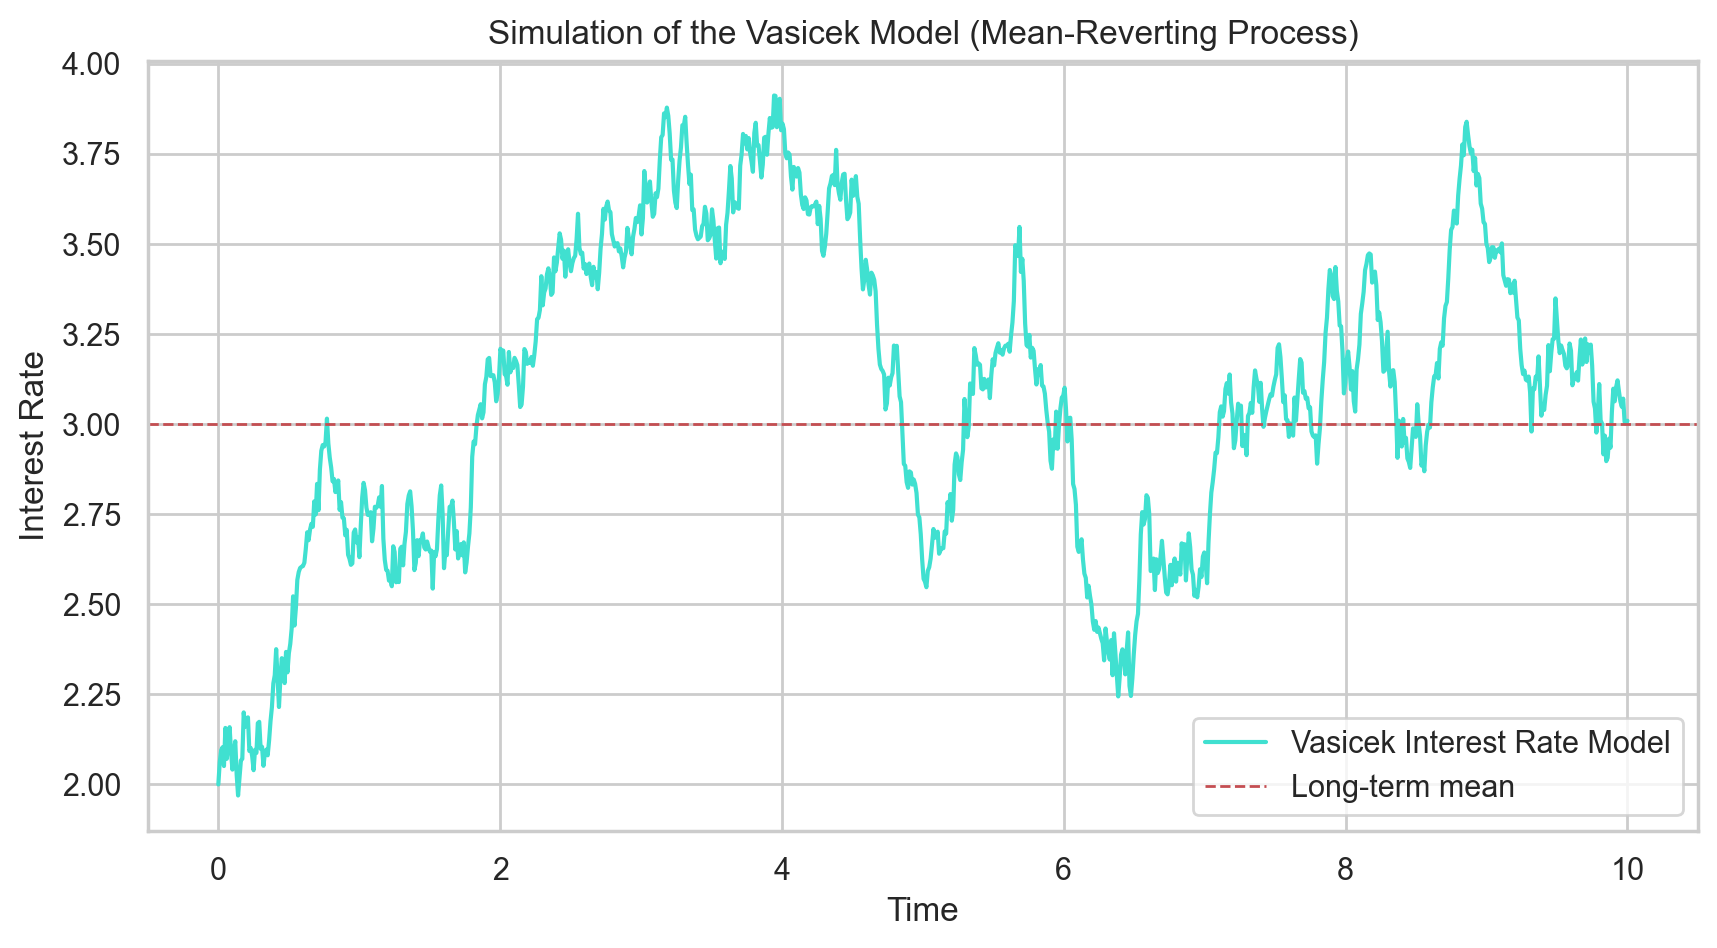

In [7]:
# Parameters for the Vasicek Model
dt = 0.01     # Time step
T = 10       # Total time
N = int(T / dt)  # Number of time steps

# Time array
t = np.linspace(0, T, N)

# Initialize interest rate array
r = np.zeros(N)
r[0] = r0

# Generate random noise (Brownian motion increments)
dW = np.sqrt(dt) * np.random.randn(N)

# Euler-Maruyama method for solving the Vasicek SDE
for i in range(1, N):
    r[i] = r[i-1] + theta * (mu - r[i-1]) * dt + sigma * dW[i]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, r, color='turquoise', label="Vasicek Interest Rate Model")
plt.axhline(mu, color='r', linestyle='--', linewidth=1, label="Long-term mean")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title("Simulation of the Vasicek Model (Mean-Reverting Process)")
plt.legend()
plt.show()


## Monte Carlo simulation

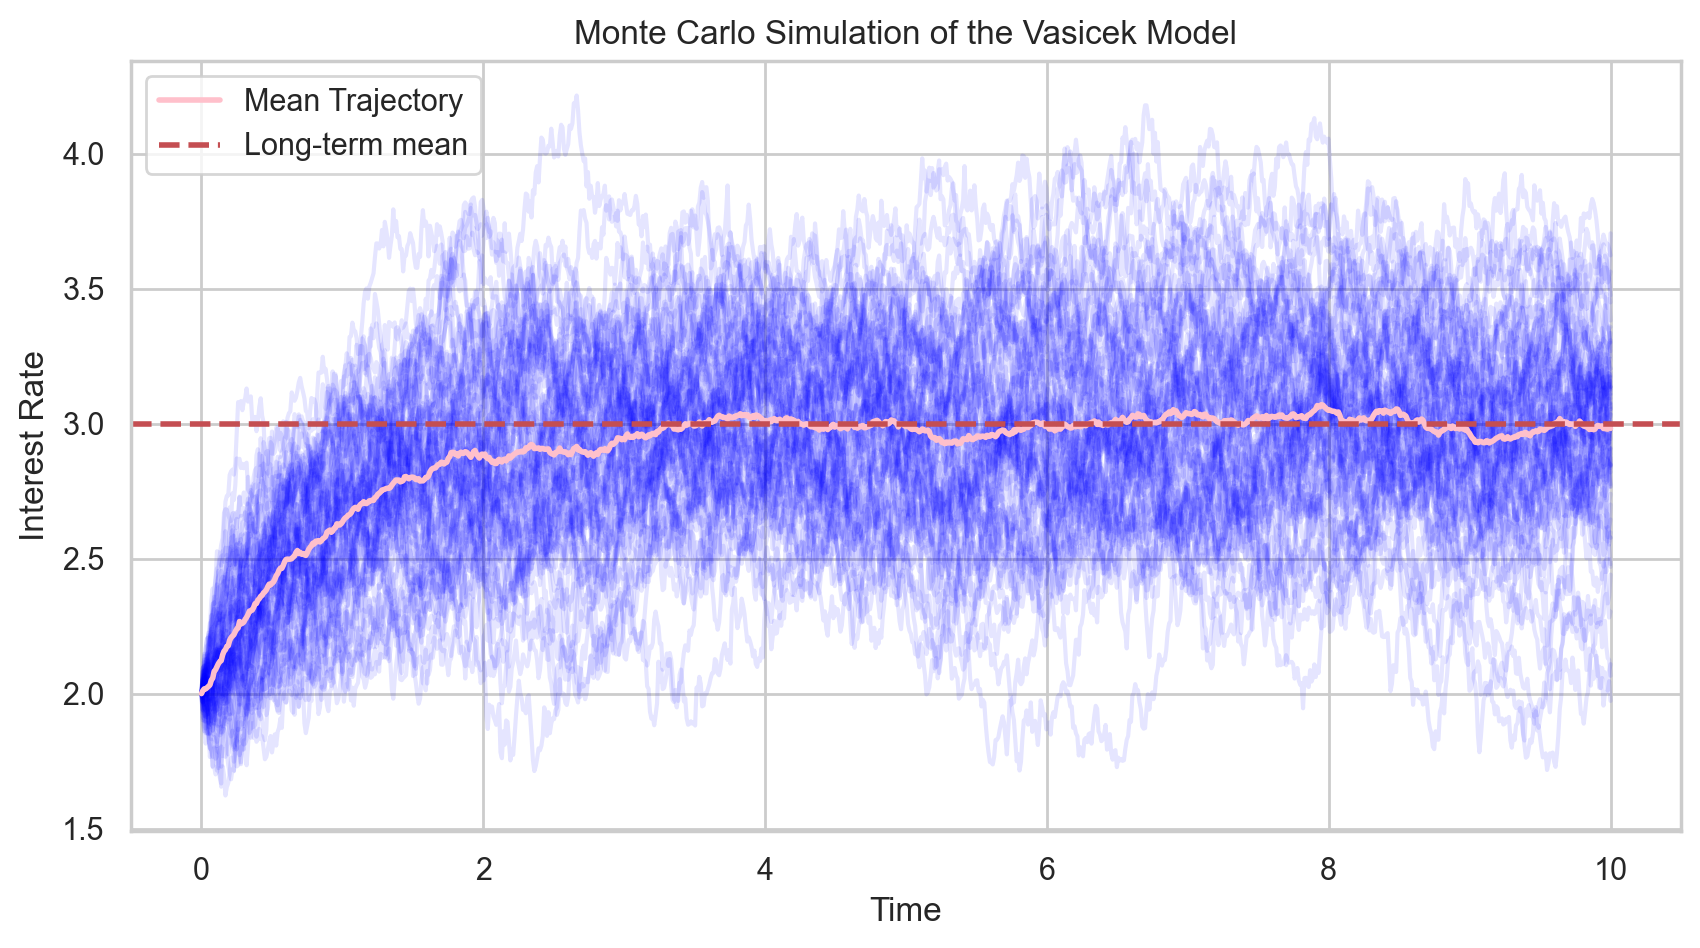

In [8]:
# Time array
t = np.linspace(0, T, N)
M = 75  # Number of Monte Carlo simulations

# Initialize interest rate array for all simulations
r = np.zeros((M, N))
r[:, 0] = r0

# Generate random noise for all simulations
dW = np.sqrt(dt) * np.random.randn(M, N)

# Euler-Maruyama method for solving the Vasicek SDE
for i in range(1, N):
    r[:, i] = r[:, i-1] + theta * (mu - r[:, i-1]) * dt + sigma * dW[:, i]

# Compute the mean trajectory
mean_r = np.mean(r, axis=0)

# Plot the results
plt.figure(figsize=(10, 5))
for i in range(M):
    plt.plot(t, r[i, :], color='blue', alpha=0.1)
plt.plot(t, mean_r, color='pink', linewidth=2, label="Mean Trajectory")
plt.axhline(mu, color='r', linestyle='--', linewidth=2, label="Long-term mean")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title("Monte Carlo Simulation of the Vasicek Model")
plt.legend()
plt.show()

### Other example, with different paraments

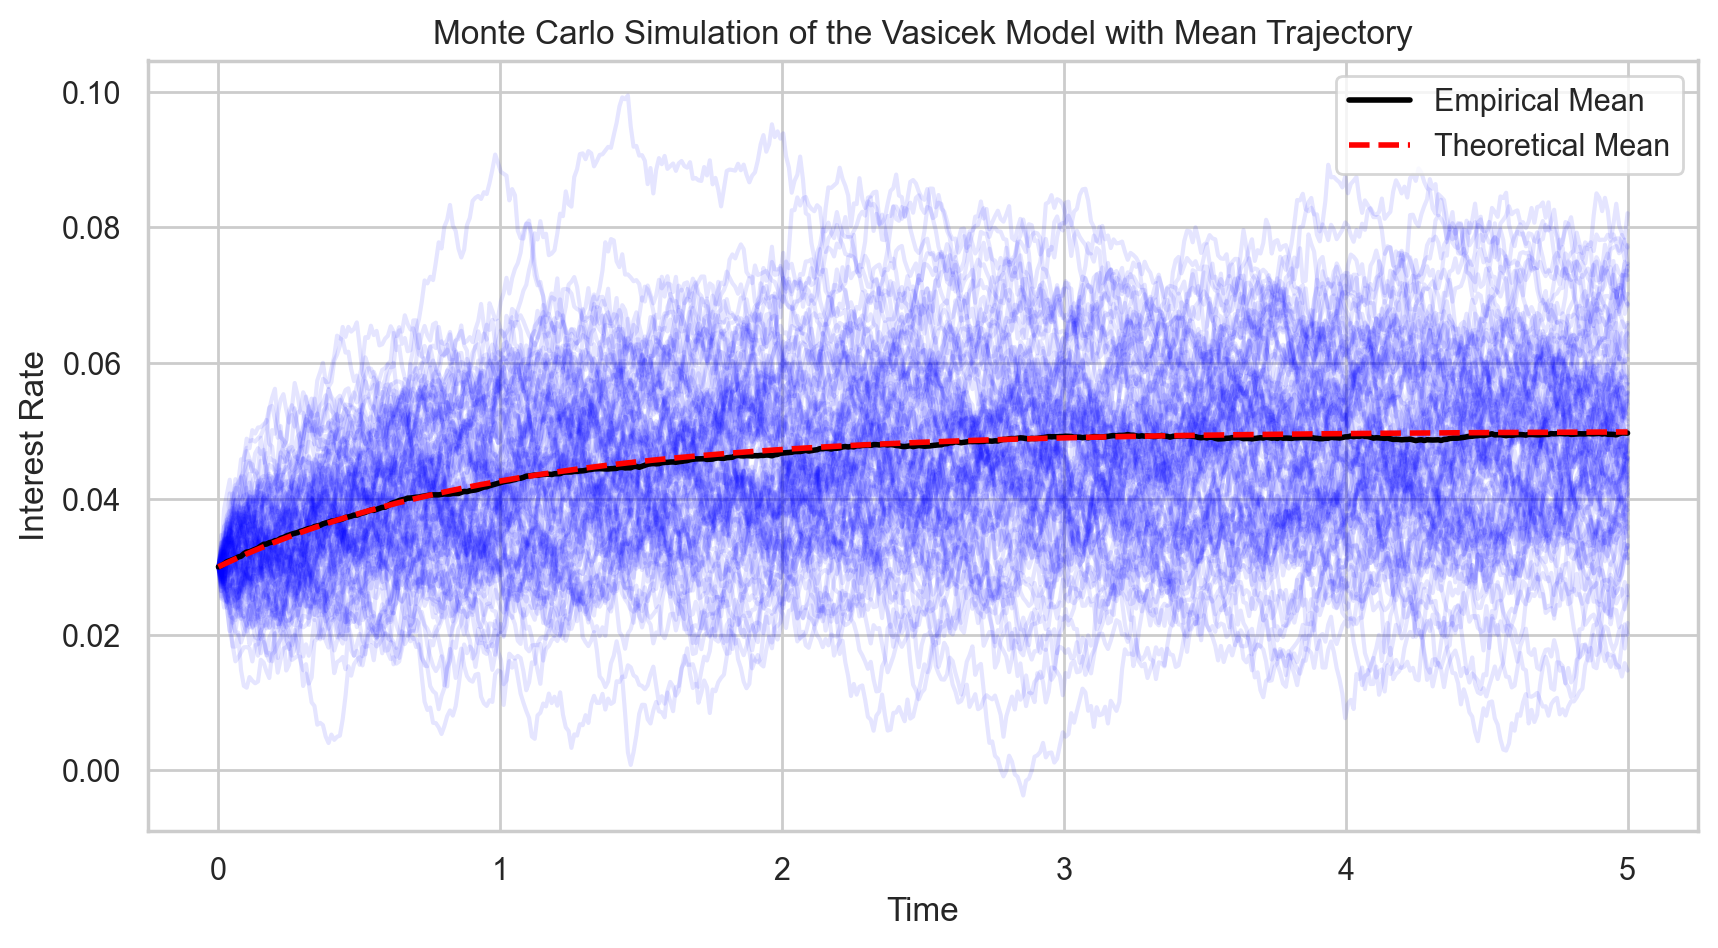

In [9]:
# Parameters for the Vasicek Model
theta = 1.0   # Mean-reversion speed
mu = 0.05     # Long-term mean interest rate
sigma = 0.02  # Volatility
r0 = 0.03     # Initial interest rate
dt = 0.01     # Time step
T = 5.0       # Total time
N = int(T / dt)  # Number of time steps
M = 1000  # Number of Monte Carlo simulations

# Time array
t = np.linspace(0, T, N)

# Initialize interest rate array for all simulations
r = np.zeros((M, N))
r[:, 0] = r0

# Generate random noise for all simulations
dW = np.sqrt(dt) * np.random.randn(M, N)

# Euler-Maruyama method for solving the Vasicek SDE
for i in range(1, N):
    r[:, i] = r[:, i-1] + theta * (mu - r[:, i-1]) * dt + sigma * dW[:, i]

# Compute theoretical mean and variance
theoretical_mean = mu + (r0 - mu) * np.exp(-theta * t)
theoretical_variance = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))

theoretical_std = np.sqrt(theoretical_variance)
empirical_mean = np.mean(r, axis=0)
empirical_variance = np.var(r, axis=0)

# Plot the simulated paths
plt.figure(figsize=(10, 5))
for i in range(100):
    plt.plot(t, r[i, :], color='blue', alpha=0.1)
plt.plot(t, empirical_mean, color='black', linewidth=2, label="Empirical Mean")
plt.plot(t, theoretical_mean, color='red', linestyle='--', linewidth=2, label="Theoretical Mean")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title("Monte Carlo Simulation of the Vasicek Model with Mean Trajectory")
plt.legend()
plt.show()



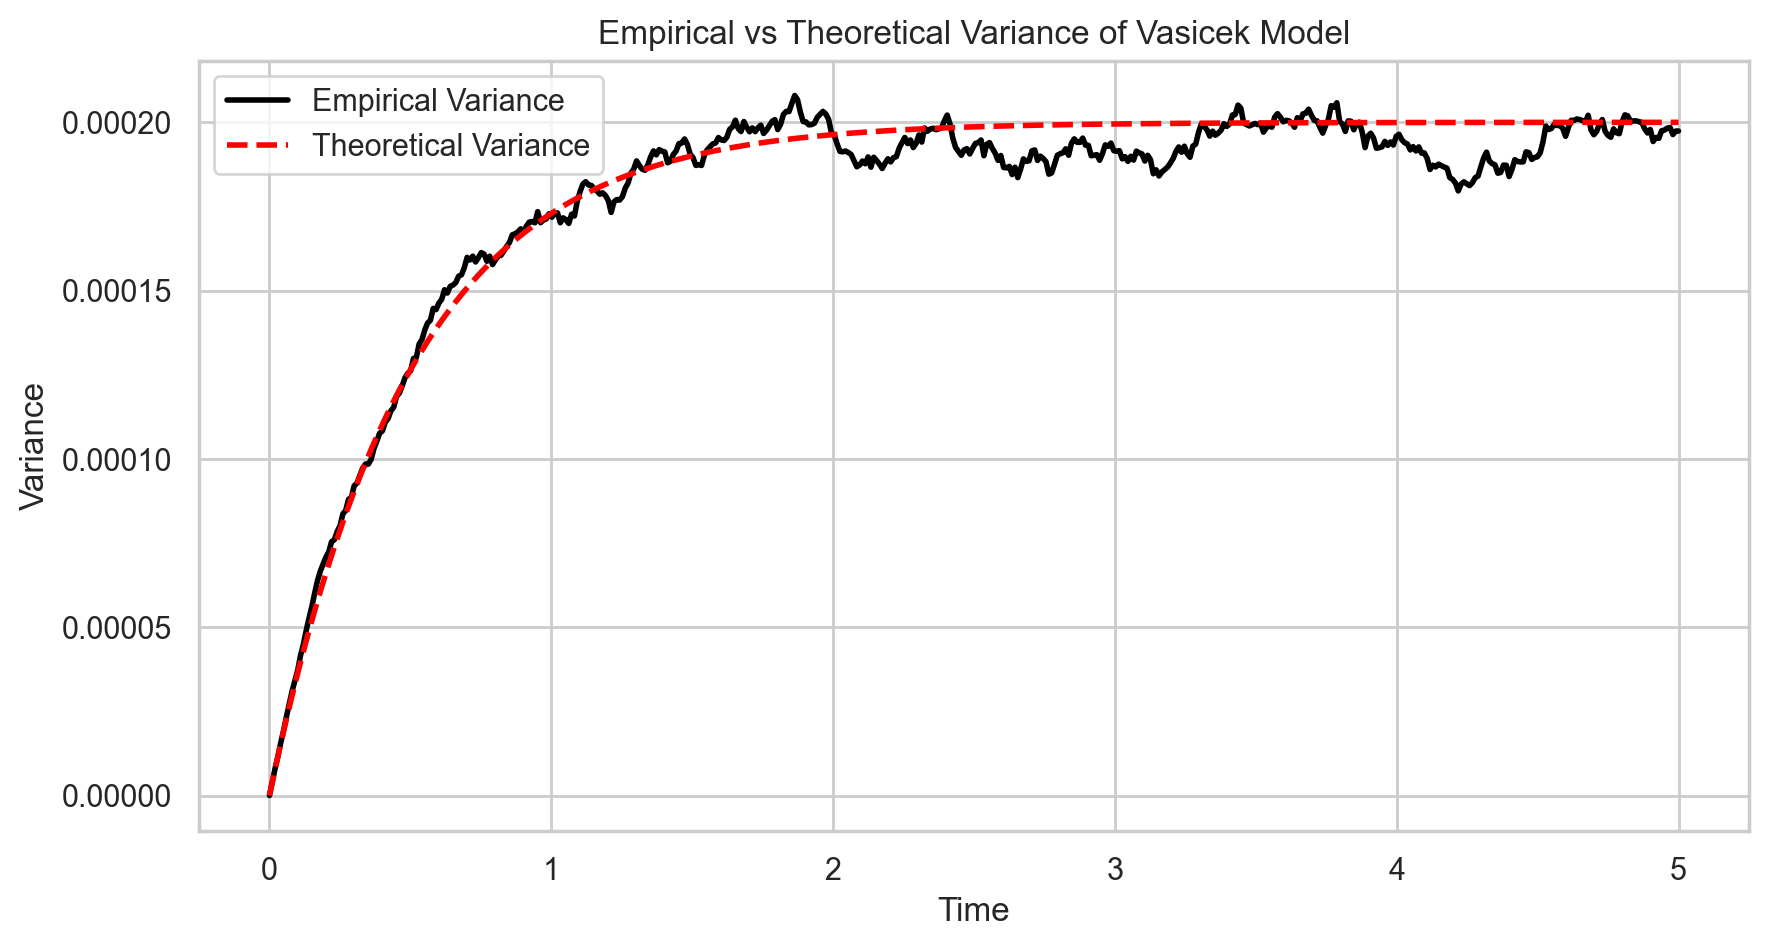

In [10]:
# Plot empirical vs theoretical variance
plt.figure(figsize=(10, 5))
plt.plot(t, empirical_variance, color='black', linewidth=2, label="Empirical Variance")
plt.plot(t, theoretical_variance, color='red', linestyle='--', linewidth=2, label="Theoretical Variance")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.title("Empirical vs Theoretical Variance of Vasicek Model")
plt.legend()
plt.show()

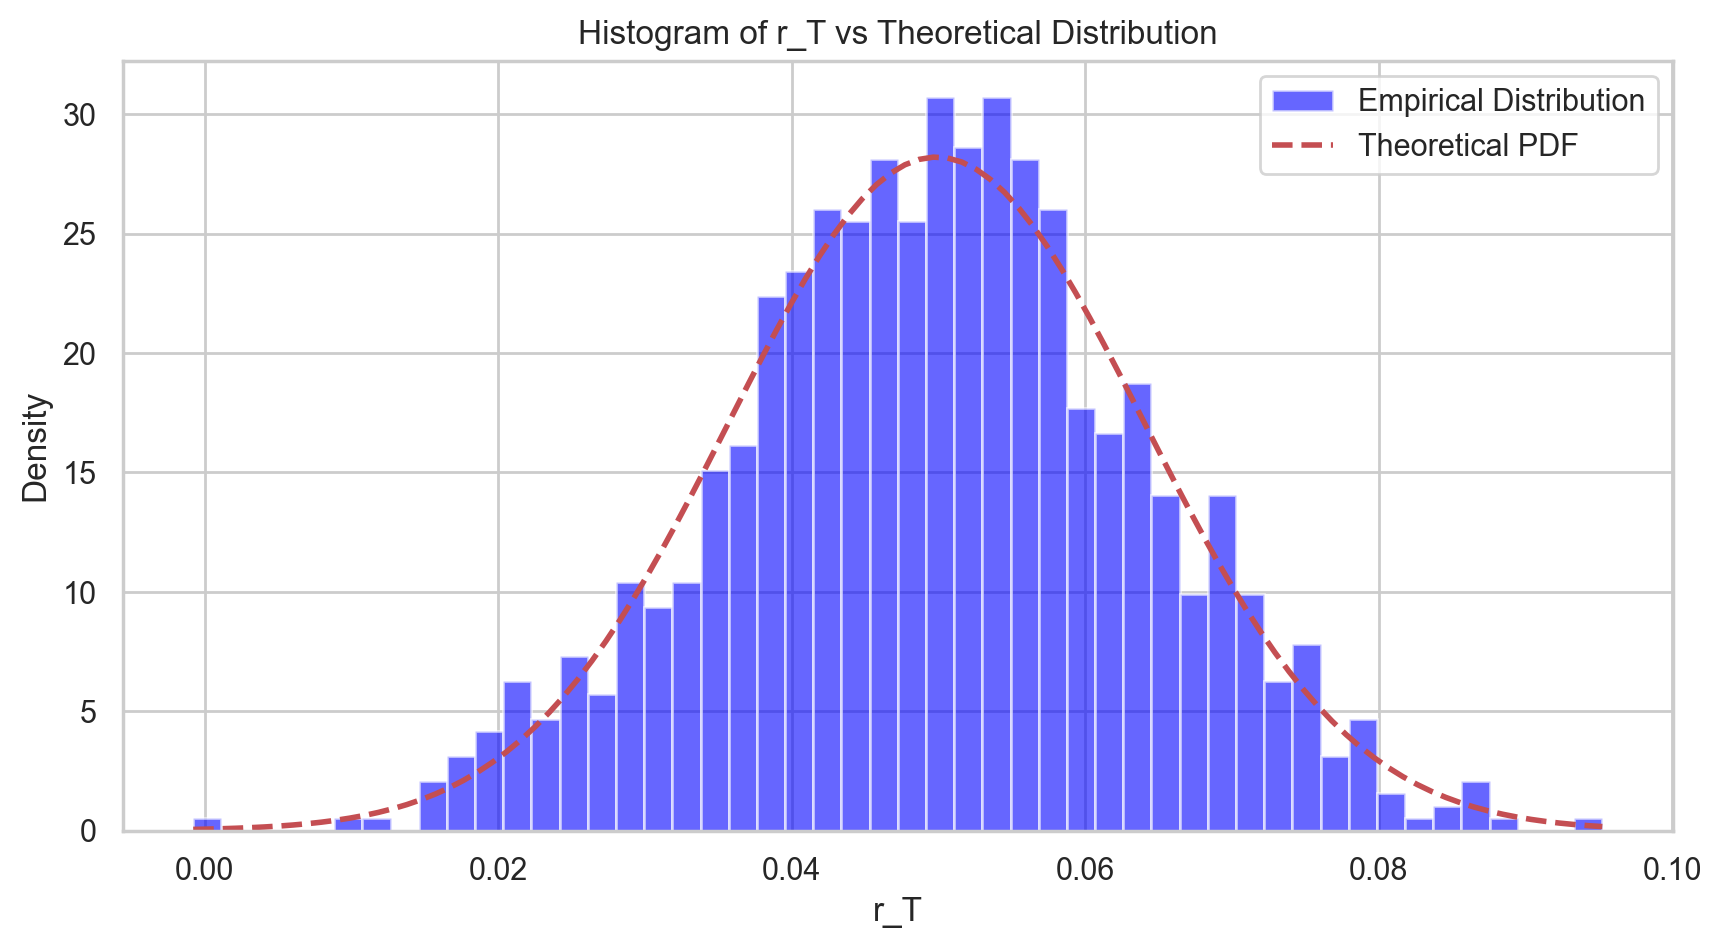

In [11]:
# Histogram of r_T
r_T = r[:, -1]
plt.figure(figsize=(10, 5))
plt.hist(r_T, bins=50, density=True, alpha=0.6, color='blue', label="Empirical Distribution")
x_vals = np.linspace(min(r_T), max(r_T), 100)
plt.plot(x_vals, norm.pdf(x_vals, theoretical_mean[-1], theoretical_std[-1]), 'r--', linewidth=2, label="Theoretical PDF")
plt.xlabel("r_T")
plt.ylabel("Density")
plt.title("Histogram of r_T vs Theoretical Distribution")
plt.legend()
plt.show()